<a href="https://colab.research.google.com/github/JasonChou0124/Solid-State-Physics-homework/blob/main/solid_state_homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***HOMEWORK 1_PROBLEM 1(3)***




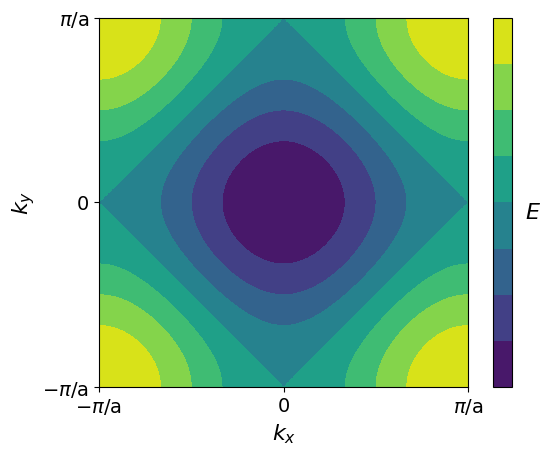

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = 1

kx = np.linspace(-np.pi/a, np.pi/a, 100)
ky = np.linspace(-np.pi/a, np.pi/a, 100)
KX, KY = np.meshgrid(kx, ky)

E = -2*np.cos(KX*a)-2*np.cos(KY*a)

plt.contourf(KX, KY, E, levels = 8)
cbar = plt.colorbar()
cbar.set_label(label=r'$E$',size = 16, rotation = 0, labelpad=15)
cbar.set_ticks([])

plt.xticks([-np.pi/a, 0, np.pi/a], [r'$-\pi$/a', '0', r'$\pi$/a'], fontsize=14)
plt.yticks([-np.pi/a, 0, np.pi/a], [r'$-\pi$/a', '0', r'$\pi$/a'], fontsize=14)

plt.xlabel(r'$k_x$', fontsize=16)
plt.ylabel(r'$k_y$', fontsize=16)
plt.gca().set_aspect('equal')

plt.show()


**HOMEWORK 1_PROBLEM 2**

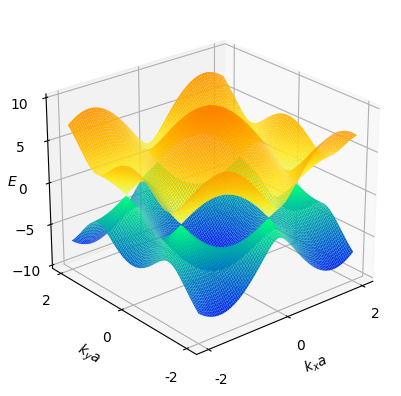

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = -3.16
a = 1.42

def Ep(kx, ky):
    return t*(1+4*np.cos((3/2)*kx*a)*np.cos(((3**0.5)/2)*ky*a)+4*(np.cos(((3**0.5)/2)*ky*a))**2)**0.5
def En(kx, ky):
    return -t*(1+4*np.cos((3/2)*kx*a)*np.cos(((3**0.5)/2)*ky*a)+4*(np.cos(((3**0.5)/2)*ky*a))**2)**0.5


kx = np.linspace(-2, 2, 100)
ky = np.linspace(-2, 2, 100)
KX, KY = np.meshgrid(kx, ky)
Z1 = Ep(KX, KY)
Z2 = En(KX, KY)

ax = plt.axes(projection='3d')
ax.plot_surface(KX, KY, Z1, cmap='winter', rstride=1, cstride=1)
ax.plot_surface(KX, KY, Z2, cmap='Wistia', rstride=1, cstride=1)

ax.set_xlabel(r'$k_xa$')
ax.set_ylabel(r'$k_ya$')
ax.set_zlabel(r'$E$', labelpad = -5)
ax.view_init(25, 50)
ax.set_box_aspect([1.2, 1.2, 1])

plt.xticks([2, 0, -2], ['-2', '0', '2'], fontsize=10)
plt.yticks([2, 0, -2], ['-2', '0', '2'], fontsize=10)
ax.set_zticks(np.arange(-10, 15, 5))

plt.show()


**HOMEWORK 1_PROBLEM 3(3)**

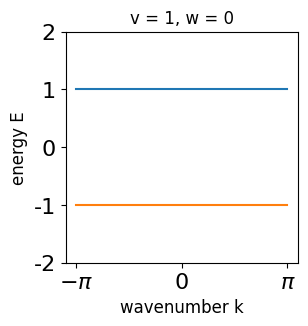

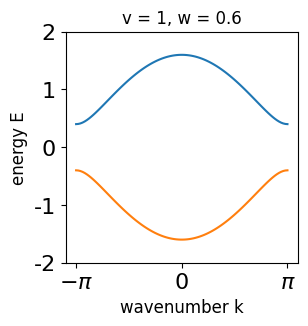

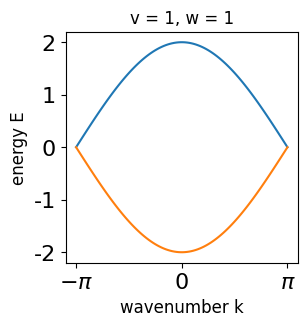

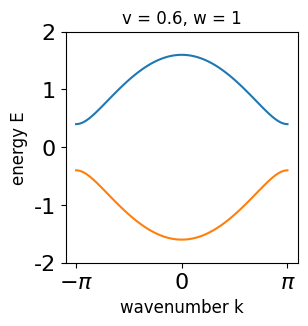

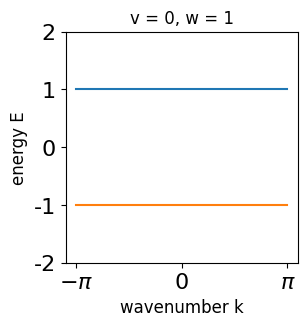

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Energy(v, w, label):
    Ep = lambda k: (v**2 + w**2 + 2*v*w*np.cos(k))**0.5
    En = lambda k: -(v**2 + w**2 + 2*v*w*np.cos(k))**0.5

    k = np.linspace(-np.pi, np.pi, 100)
    plt.figure(figsize=(3, 3))
    plt.plot(k, Ep(k), label='Ep')
    plt.plot(k, En(k), label='En')
    plt.xlabel('wavenumber k', fontsize=12)
    plt.ylabel('energy E', fontsize=12)
    plt.xticks([-np.pi, 0, np.pi], [r'$-\pi$', '0', r'$\pi$'], fontsize=16)
    plt.yticks([-2, -1, 0, 1, 2], ['-2', '-1', '0', '1', '2'], fontsize=16)
    plt.title(label)
    plt.show()

parameters = [(1, 0, 'v = 1, w = 0'), (1, 0.6, 'v = 1, w = 0.6'), (1, 1, 'v = 1, w = 1'), (0.6, 1, 'v = 0.6, w = 1'), (0, 1, 'v = 0, w = 1')]

for v, w, label in parameters:
    Energy(v, w, label)


**HOMEWORK 1_PROBLEM 4**

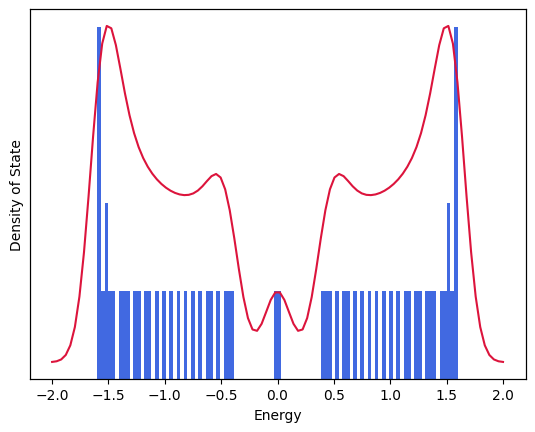

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

N = 30
v = 0.6
w = 1

def SSH_Hamiltonian(N, v, w):
    H = np.zeros((2 * N, 2 * N))

    for i in range(N):
        H[2*i-1, 2*(i-1)] = v
        H[2*(i-1), 2*i-1] = v
        H[2*i, 2*i-1] = w
        H[2*i-1, 2*i] = w
        H[0, 2*N-1] = 0
        H[2*N-1, 0] = 0

    return H

eigenvalues = np.linalg.eigvalsh(SSH_Hamiltonian(N, v, w))

bins = 100
fig, ax1 = plt.subplots()
bin_values, bin_lims, _patches  = plt.hist(eigenvalues, bins, color='royalblue')

x = np.linspace(-2, 2, 100)
kde = gaussian_kde(eigenvalues, 0.1)
ax2 = ax1.twinx()
ax2.plot(x, kde(x), color='crimson')

ax1.set_xlabel('Energy')
ax1.set_ylabel('Density of State')
ax1.set_yticks([])
ax2.set_yticks([])

plt.show()
